In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('/content/Resume.csv.zip')

df.head()
print(df.columns)

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


In [4]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]


    return ' '.join(txt)

In [5]:
# preprocessing text
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))

LookupError: ignored

In [6]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].valuesimport spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text



LookupError: ignored

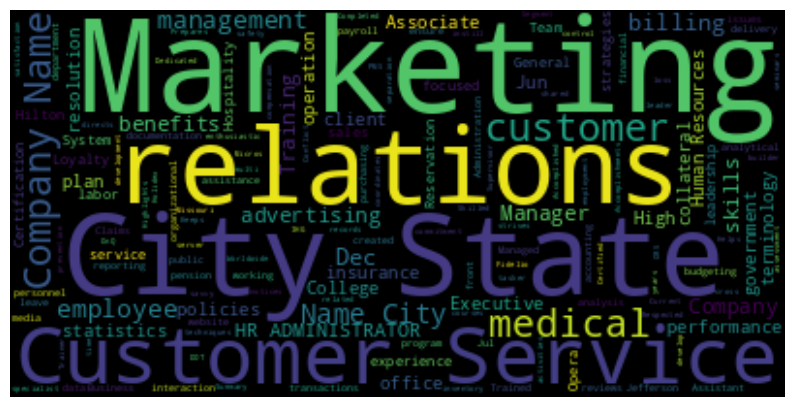

In [7]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [9]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ["Resume_str", 'Category']] for category in categories]
df_categories

[                                             Resume_str    Category
 1808           ACCOUNTANT       Professional Summary...  ACCOUNTANT
 1809           ACCOUNTANT       Summary      Innovat...  ACCOUNTANT
 1810           ACCOUNTANT         Highlights        ...  ACCOUNTANT
 1811           ACCOUNTANT           Professional Sum...  ACCOUNTANT
 1812           ACCOUNTANT       Summary    To pursue...  ACCOUNTANT
 ...                                                 ...         ...
 1921           GENERAL ACCOUNTANT       Professional...  ACCOUNTANT
 1922           STAFF ACCOUNTANT       Professional S...  ACCOUNTANT
 1923           GENERAL ACCOUNTANT           Summary ...  ACCOUNTANT
 1924           PROJECT ACCOUNTANT           Career F...  ACCOUNTANT
 1925           SENIOR ACCOUNTANT           Summary  ...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                             Resume_str  Category
 439           ADVOCATE         Professional Summary...  ADVOCATE
 440         

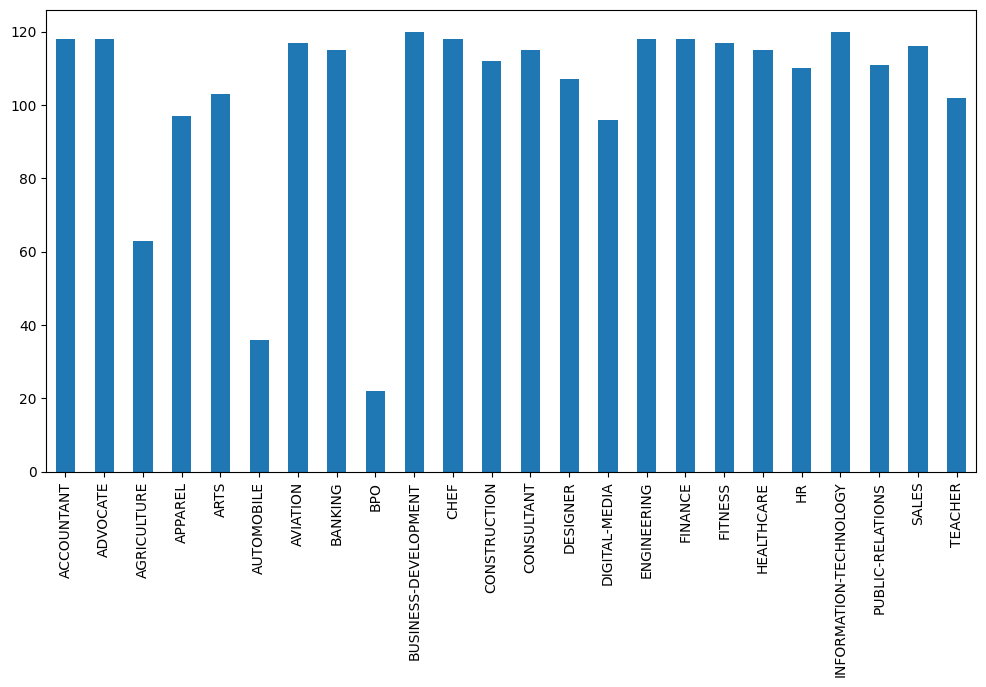

In [10]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [11]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [12]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

In [13]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [14]:
df.Category.value_counts()

20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [16]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(1987, 40236)
(497, 40236)


In [21]:
from sklearn.utils import shuffle

features = df['Resume_str'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):

    labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

         DIRECTOR OF FINANCE           Professional Summary    Seeking a position in financial/general accounting. Highly meticulous and reliable Finance Director with an outstanding client service record. Adept multitasker able to handle a number of cash management projects with professionalism and accuracy. Strong research skills in optimizing current and efficient cash management team operation.      Experience      Director of Finance    May 2016   to   Current     Company Name   －   City  ,   State      Manages the day to day accounting department, including hands on monthly close, commission reports, financial statements.  Manages financial tasks, budgeting and overall accounting of the company.  Develop and implement short and long-term financial strategies and tactics in alignment with the company's business plan and strategic initiatives.  Develop and monitor policies and procedures within generally accepted accounting principles and corporate guidelines to ensure sufficient c

In [22]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

1987
497


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'and': 2, 'to': 3, 'of': 4, 'the': 5, 'in': 6, 'for': 7, 'with': 8, 'a': 9, 'state': 10, 'city': 11, 'company': 12, 'management': 13, 'name': 14, 'on': 15, 'as': 16, 'all': 17, 'sales': 18, 'business': 19, 'customer': 20, 'skills': 21, '－': 22, 'by': 23, 'new': 24, 'service': 25, 'team': 26, 'development': 27, 'training': 28, 'experience': 29, 'project': 30, 'work': 31, 'i': 32, 'manager': 33, 'information': 34, 'marketing': 35, 'or': 36, 'that': 37, 'financial': 38, 'office': 39, 'support': 40, 'education': 41, 'including': 42, 'from': 43, 'staff': 44, 'at': 45, 'professional': 46, 'data': 47, 'system': 48, 'systems': 49, 'university': 50, 'process': 51, 'managed': 52, 'design': 53, 'quality': 54, 'developed': 55, 'customers': 56, 'an': 57, 'clients': 58, '\xa0': 59, 'client': 60, 'reports': 61, 'analysis': 62, 'operations': 63, 'product': 64, 'high': 65, 'program': 66, 'other': 67, 'services': 68, 'accounting': 69, 'microsoft': 70, '01': 71, '2014': 72, 'current': 73, 'acco

In [24]:
# Tokenize label data
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'information': 1, 'technology': 2, 'business': 3, 'development': 4, 'finance': 5, 'accountant': 6, 'advocate': 7, 'chef': 8, 'engineering': 9, 'fitness': 10, 'aviation': 11, 'sales': 12, 'consultant': 13, 'banking': 14, 'healthcare': 15, 'construction': 16, 'public': 17, 'relations': 18, 'hr': 19, 'designer': 20, 'arts': 21, 'teacher': 22, 'apparel': 23, 'digital': 24, 'media': 25, 'agriculture': 26, 'automobile': 27, 'bpo': 28}


In [27]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[ 177    4  180   46  118 1032    9  368    6   38  143   69  479 2772
    2 1315  180  177    8   57  741   60   25  374 1773    1  630    3
 1139    9  709    4  166   13   84    8 2357    2  470  152  131   21
    6 4075   73    2  662  166   13   26  498   29  177    4  180  211
  197    3   73   12   14   22   11   10 1943    5  222    3  222   69
  107   42 1231   15  130  840 2014   61   38  485 1943   38  364  663
    2  599   69    4    5   12  168    2  517 1409    2  610  742   38
  221    2 2659    6 2592    8    5  841   19  187    2  157  556  168
    2  613  128    2   80  161 4886 2560   69 1350    2  240  607    3
   88 4381  166  571  862  395  196    2  407 1849 1376  613   85    2
  289  652   34    2   13   61    3 2502  252  803  400   23    5 1861
  188    2  168 1147    2 4076   38  202  686   38 1123  181  559    5
 1232    4   17 2185    2  129  218  120 1943  130    2 1681  548  385
   42   48  548 1033  593  283    2   97  721  289    2  261   17  207
  320 

In [25]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 64)             384000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459994 (1.75 MB)
Trainable params: 459994 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

<ipython-input-28-de2838c1f08a>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_label_sequences = np.array(train_label_sequences)
<ipython-input-28-de2838c1f08a>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_label_sequences = np.array(test_label_sequences)


In [30]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=f0f64d20cc8427640488ef610fdc3ae35bf709061b238a3320560e8a54545808
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [31]:
from tika import parser

In [33]:
file = r'/content/DIVYA RESUME.PDF.pdf'
file_data = parser.from_file(file)

2023-10-28 08:08:11,779 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-10-28 08:08:12,296 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-10-28 08:08:12,618 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [38]:
text = file_data['content']
print(text)







































Pink Simple Profile Resume


DIVYALAKSHMI.M

CARRER OBJECTIVE

EDUCATION BACKGROUND

POSITION AND RESPONSIBILITY 

An inquistive learner looking forward for a
challenging position in a progressive organization
that will utilize my talents and provides with an
opportunity for a personal and professional growth.

TECHNICAL SKILLS 

Python 
Data structure 
Basics of AI/ML
Data visualization
technique

SOFT SKILLS

ACHIEVEMNTS

PROFILE

FATHER'S NAME :
K.MURALIDHARAN
D.O.B : 09/02/2004
NATIONALITY : Indian
LANGUAGES : Tamil,
English 

6383125465 

PURSUING  UG 

HSC - 2021

SSLC - 2019

      B.Tech - Artificial intelligence and data science
      Psna college of engineering and tecchnology 
       CGPA- 8.15

     SMBM MATIC.HR.SEC.SCHOOL 94.4% in HSC

   SMBM MATRIC.HR.SEC.SCHOOL 94.4% in SSLC

  
 

Teamwork &
collaboration 
Leadership skill 
Communication
skill  
Creative thinking 

. 

MICROSOFT -  Alpha learn student ambassador
(MLSA)
ELEWAYTE CO

In [39]:
parsed_content = {}

In [40]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
print(email)
parsed_content['E-mail'] = email

['divyalakshmim21ad@psnacet.']


In [41]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
if len(phone_number) <= 10:
    print(phone_number)
    parsed_content['Phone number'] = phone_number

['6383125465']


In [43]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print(name)
parsed_content['Name'] =  name

Pink Simple


In [45]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "projects",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [46]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass

In [48]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

ValueError: ignored